# Modelos lineales y regularizacion

In [36]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

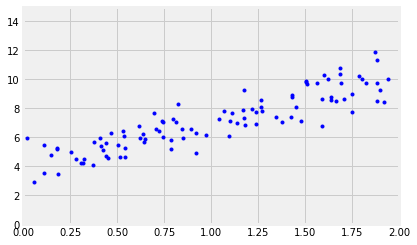

In [47]:
import matplotlib.pyplot as plt

plt.plot(X,y,'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [49]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
w_hat = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [40]:
print(w_hat)

[[3.98365155]
 [3.10586305]]


In [50]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(w_hat)

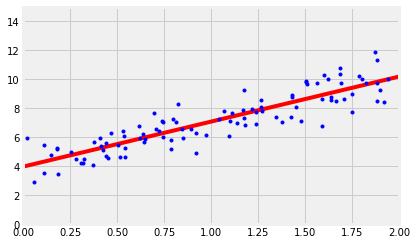

In [51]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [54]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print('Coeficientes Sklearn : ',lin_reg.intercept_, lin_reg.coef_)
print('Coeficientes Manual : ',w_hat)

[3.98365155] [[3.10586305]]


# Regularizacion

In [90]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * np.sin(X) + 2*np.random.randn(100, 1)

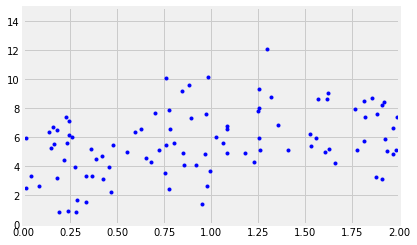

In [124]:
import matplotlib.pyplot as plt

plt.plot(X,y,'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [125]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2,interaction_only=False,include_bias=True)
poly.fit(X)
X_p=poly.transform(X)

In [126]:
X_p[0]

array([1.       , 0.3653527, 0.1334826])

In [127]:
X[0]

array([0.3653527])

In [128]:
lin_reg = LinearRegression()
lin_reg.fit(X_p, y)
r2=lin_reg.score(X_p, y)
print('Coeficientes Sklearn : ',lin_reg.intercept_, lin_reg.coef_)

Coeficientes Sklearn :  [3.23573563] [[ 0.          4.32549125 -1.38772538]]


In [129]:
y_predict=lin_reg.predict(X_p)

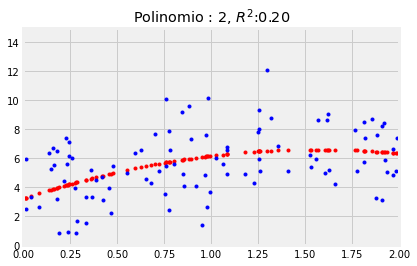

In [130]:
plt.plot(X_p[:,1], y_predict, "r.")
plt.plot(X,y,'b.')
plt.title(r'Polinomio : {0}, $R^2$:{1:0.2f}'.format(2,r2))
plt.axis([0, 2, 0, 15])
plt.show()

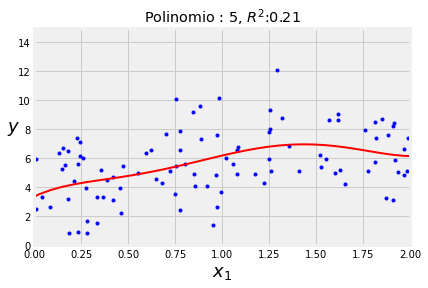

In [131]:
K=5
poly=PolynomialFeatures(degree=K,interaction_only=False,include_bias=True)
poly.fit(X)
X_p=poly.transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_p, y)
r2=lin_reg.score(X_p, y)
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.title(r'Polinomio : {0}, $R^2$:{1:0.2f}'.format(K,r2))
plt.show()

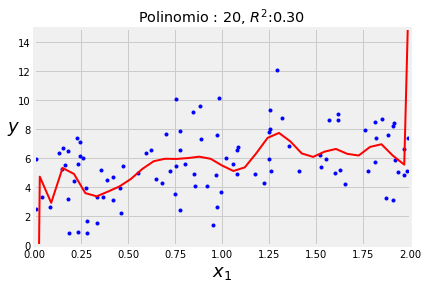

In [132]:
K=20
poly=PolynomialFeatures(degree=K,interaction_only=False,include_bias=True)
poly.fit(X)
X_p=poly.transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_p, y)
r2=lin_reg.score(X_p, y)
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.title(r'Polinomio : {0}, $R^2$:{1:0.2f}'.format(K,r2))
plt.show()

In [113]:
print(X_p.shape)

(100, 21)


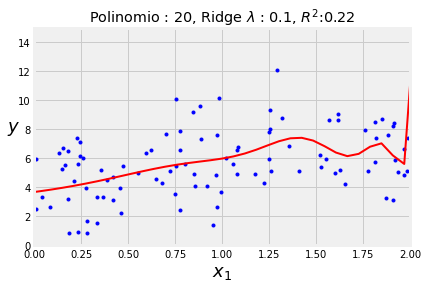

In [146]:
from sklearn.linear_model import Ridge

lamb=0.1
K=20

poly=PolynomialFeatures(degree=K,interaction_only=False,include_bias=True)
poly.fit(X)
X_p=poly.transform(X)

ridge_reg = Ridge(alpha=lamb, solver="cholesky", random_state=42)
ridge_reg.fit(X_p, y)
r2=ridge_reg.score(X_p, y)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly.transform(X_new)
y_new = ridge_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.title(r'Polinomio : {0}, Ridge $\lambda$ : {1}, $R^2$:{2:0.2f}'.
          format(K,lamb,r2))
plt.show()

/home/sergio/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 222.98970689996847, tolerance: 0.05291220723801615
  positive)


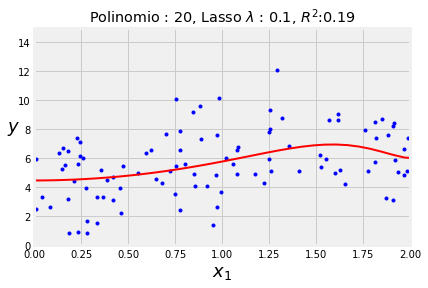

In [147]:
from sklearn.linear_model import Lasso

lamb=0.1
K=20

poly=PolynomialFeatures(degree=K,interaction_only=False,include_bias=True)
poly.fit(X)
X_p=poly.transform(X)

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_p, y)
r2=lasso_reg.score(X_p, y)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly.transform(X_new)
y_new = lasso_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.title(r'Polinomio : {0}, Lasso $\lambda$ : {1}, $R^2$:{2:0.2f}'.
          format(K,lamb,r2))
plt.show()

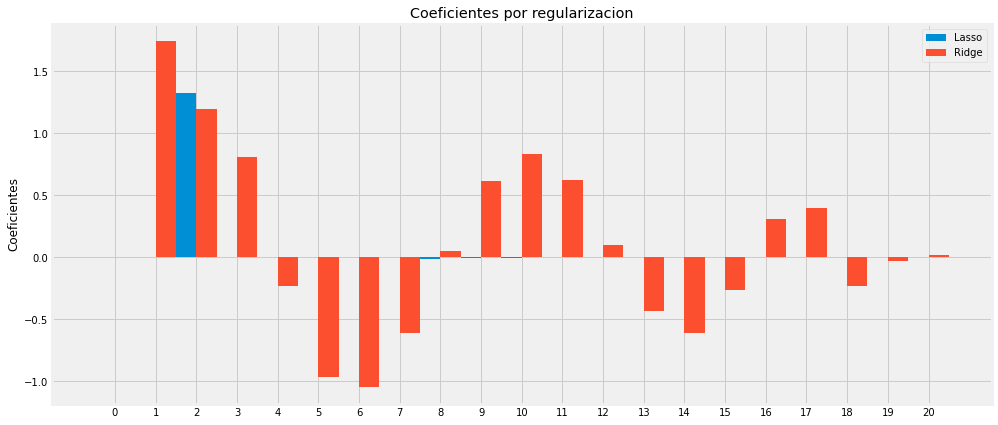

In [159]:
x = np.arange(len(lasso_reg.coef_))  # the label locations
width = 0.5  # the width of the bars
fig, ax = plt.subplots(figsize=(15,7))
rects1 = ax.bar(x - width/2, lasso_reg.coef_, width, label='Lasso')
rects2 = ax.bar(x + width/2, ridge_reg.coef_[0], width, label='Ridge')

ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes por regularizacion')
ax.set_xticks(x)
#ax.set_xticklabels(labels)
ax.legend()

# Tarea

En este laboratorio Ud debe completar las siguientes tareas:


1.   Implementar un modelo base para predecir el total de 'casos por millon de habitantes' a partir de las caracteristicas del pais (edad de la problacion, ingreso per capita, etc).
2. Reportar la metrica de ajuste del modelo base.
3. Reportar la metrica de ajuste del modelo usando feature engineering.
